# Australian Credit Approval Support Vector Machines (SVM) 
### [(Australian Credit Approval) Data Set ](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Aust_Credit_Approval_Data.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


In [4]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## EDA

In [5]:
df['target'].value_counts()

0    383
1    307
Name: target, dtype: int64

**Considering x8 as a sex (male 1 and female 0), which sex have better chances for credit approval?**

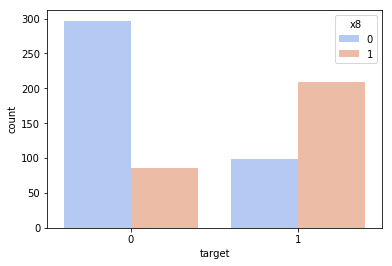

In [6]:
sns.countplot(x='target', data=df, hue = 'x8',palette='coolwarm');

**Considering x4 as a credit score, which score is the highest number of counts?**

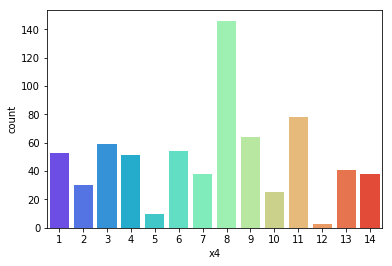

In [7]:
sns.countplot(x='x4', data=df, palette='rainbow');

**Once again, with our assumptions: x8:sex and x4:credit score, what is the probability for male and female to get approved if the score is greater than 7?**

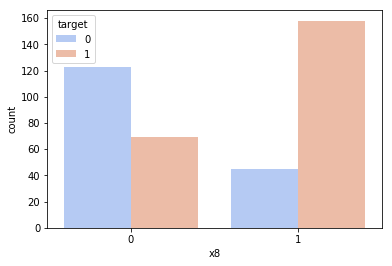

In [8]:
sns.countplot(x='x8', data=df[df['x4']>7], hue = 'target',palette='coolwarm');

**Considering x1 as age, what is the age distribution of targets**

Text(0.5,0,'Age')

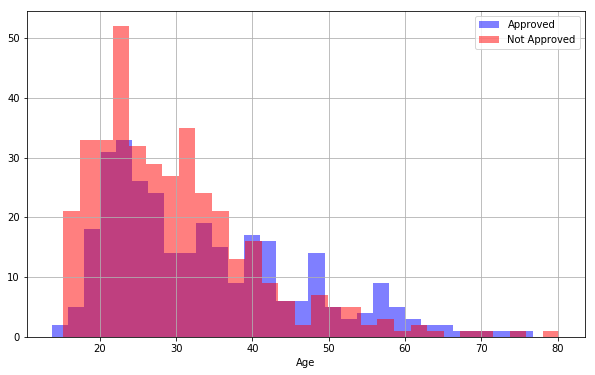

In [9]:
plt.figure(figsize=(10,6))
df[df['target']==1]['x1'].hist(alpha=0.5,color='blue',bins=30,label='Approved')
df[df['target']==0]['x1'].hist(alpha=0.5,color='red',bins=30,label='Not Approved')
plt.legend()
plt.xlabel('Age')

**Considering, x12 is amount in thousands, how x1 and x12 are relation?**

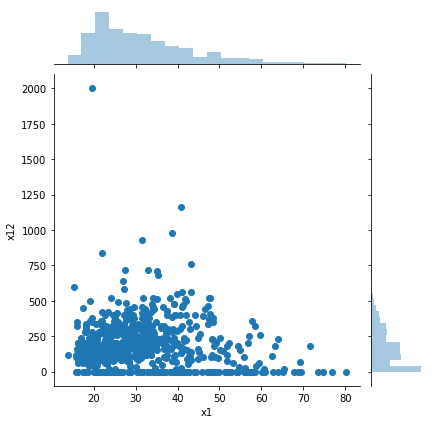

In [10]:
sns.jointplot(data=df, x='x1',y='x12')

## SVM

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis = 1)
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[134   3]
 [ 88   3]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       137
           1       0.50      0.03      0.06        91

   micro avg       0.60      0.60      0.60       228
   macro avg       0.55      0.51      0.40       228
weighted avg       0.56      0.60      0.47       228



### Gridsearch

In [16]:
param_grid = {'C': [0.01,0.1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

In [17]:
# We need to import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid,cv=10)
grid.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [19]:
grid_predictions = grid.predict(X_test)

In [20]:
print(confusion_matrix(y_test,grid_predictions))


[[115  22]
 [ 35  56]]


In [21]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       137
           1       0.72      0.62      0.66        91

   micro avg       0.75      0.75      0.75       228
   macro avg       0.74      0.73      0.73       228
weighted avg       0.75      0.75      0.75       228

